# 短程-建立模型-最低價格_log

**隨機森林**

In [1]:
import re
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# 讀取數據
file_path = '/Users/yuchingchen/Documents/專題/cleaned_data/short_flight_final.csv'
data = pd.read_csv(file_path)

# One-hot encoding
categorical_cols = ['星期', '出發時段', '出發機場代號', '抵達時段', '抵達機場代號', '機場客運量分類',
                    '航空公司', '航空聯盟', '是否過夜', '是否為平日', '機型', '機型分類', '艙等', '假期', 'Region']
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# 數值型特徵標準化
num_cols = ['飛行時間_分鐘', 'Cost of Living Index', 'GDP (PPP) per capita (in thousand USD)', 'competing_flights']
scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])

# 選取建模特徵
target_keywords = ['出發時段_', '抵達時段_', '航空聯盟_', '機型分類_', '是否為平日_', '假期_', 'Region_', '機場客運量分類_']
dummy_cols = [col for col in data.columns if any(keyword in col for keyword in target_keywords)]
feature_cols = dummy_cols + ['飛行時間_分鐘', 'Cost of Living Index', 'GDP (PPP) per capita (in thousand USD)', 'competing_flights']

# 定義自變數與目標變數
X = data[feature_cols]
y = data["最低價格_log"]

# 設定五組隨機種子
seeds = [123, 234, 345, 456, 567]
results = []

for seed in seeds:
    # 分割數據集
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

    # 建立隨機森林回歸模型
    model = RandomForestRegressor(n_estimators=200, random_state=seed, n_jobs=-1)
    model.fit(X_train, y_train)

    # 預測
    y_pred = model.predict(X_test)

    # 評估
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # 儲存結果
    results.append({'Seed': seed, 'MSE': mse, 'R^2': r2})

# 轉換為 DataFrame 並顯示
results_df = pd.DataFrame(results)
print(results_df)

   Seed       MSE       R^2
0   123  0.105551  0.675408
1   234  0.089638  0.723726
2   345  0.110503  0.655793
3   456  0.100603  0.690964
4   567  0.080627  0.746680


**SVM**

In [2]:
import re
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# 讀取數據
file_path = '/Users/yuchingchen/Documents/專題/cleaned_data/short_flight_final.csv'
data = pd.read_csv(file_path)

# One-hot encoding
categorical_cols = ['星期', '出發時段', '出發機場代號', '抵達時段', '抵達機場代號', '機場客運量分類', 
                    '航空公司', '航空聯盟', '是否過夜', '是否為平日', '機型', '機型分類', '艙等', '假期', 'Region']
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# 數值型特徵標準化（SVR 需要標準化）
num_cols = ['飛行時間_分鐘', '最低價格剩餘天數', 'Cost of Living Index', 'GDP (PPP) per capita (in thousand USD)', 'competing_flights']
scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])

# 選取建模特徵
target_keywords = ['出發時段_', '抵達時段_', '航空聯盟_', '機型分類_', '是否為平日_', '假期_', 'Region_', '機場客運量分類_']
dummy_cols = [col for col in data.columns if any(keyword in col for keyword in target_keywords)]
feature_cols = dummy_cols + ['飛行時間_分鐘', '最低價格剩餘天數', 'Cost of Living Index', 'GDP (PPP) per capita (in thousand USD)', 'competing_flights']

# 定義自變數與目標變數
X = data[feature_cols]
y = data["最低價格_log"]

# 設定五組隨機種子
seeds = [123, 234, 345, 456, 567]
results = []

for seed in seeds:
    # 分割數據集
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

    # 建立 SVR 模型
    model = SVR(kernel='rbf', C=1.0, epsilon=0.1)  # RBF 核函數
    model.fit(X_train, y_train)

    # 預測
    y_pred = model.predict(X_test)

    # 評估
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # 儲存結果
    results.append({'Seed': seed, 'MSE': mse, 'R^2': r2})

# 轉換為 DataFrame 並顯示
results_df = pd.DataFrame(results)
print(results_df)

   Seed       MSE       R^2
0   123  0.082530  0.746202
1   234  0.065803  0.797188
2   345  0.076471  0.761798
3   456  0.077458  0.762063
4   567  0.059807  0.812095


**XGBoost**

In [3]:
import re
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# 讀取數據
file_path = '/Users/yuchingchen/Documents/專題/cleaned_data/short_flight_final.csv'
data = pd.read_csv(file_path)

# One-hot encoding
categorical_cols = ['星期', '出發時段', '出發機場代號', '抵達時段', '抵達機場代號', '機場客運量分類', 
                    '航空公司', '航空聯盟', '是否過夜', '是否為平日', '機型', '機型分類', '艙等', '假期', 'Region']
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# 數值型特徵標準化（XGBoost **不一定** 需要標準化，但可以做）
num_cols = ['飛行時間_分鐘', '最低價格剩餘天數', 'Cost of Living Index', 'GDP (PPP) per capita (in thousand USD)', 'competing_flights']
scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])

# 選取建模特徵
target_keywords = ['出發時段_', '抵達時段_', '航空聯盟_', '機型分類_', '是否為平日_', '假期_', 'Region_', '機場客運量分類_']
dummy_cols = [col for col in data.columns if any(keyword in col for keyword in target_keywords)]
feature_cols = dummy_cols + ['飛行時間_分鐘', '最低價格剩餘天數', 'Cost of Living Index', 'GDP (PPP) per capita (in thousand USD)', 'competing_flights']

# 定義自變數與目標變數
X = data[feature_cols]
y = data["最低價格_log"]

# 設定五組隨機種子
seeds = [123, 234, 345, 456, 567]
results = []

for seed in seeds:
    # 分割數據集
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

    # 建立 XGBoost 模型
    model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=seed, n_jobs=-1)
    model.fit(X_train, y_train)

    # 預測
    y_pred = model.predict(X_test)

    # 評估
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # 儲存結果
    results.append({'Seed': seed, 'MSE': mse, 'R^2': r2})

# 轉換為 DataFrame 並顯示
results_df = pd.DataFrame(results)
print(results_df)

   Seed       MSE       R^2
0   123  0.040130  0.876593
1   234  0.048178  0.851510
2   345  0.053233  0.834183
3   456  0.043993  0.864862
4   567  0.056206  0.823408


**30次平均**

In [4]:
import re
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# 讀取數據
file_path = '/Users/yuchingchen/Documents/專題/cleaned_data/short_flight_final.csv'
data = pd.read_csv(file_path)

# One-hot encoding
categorical_cols = ['星期', '出發時段', '出發機場代號', '抵達時段', '抵達機場代號', '機場客運量分類', 
                    '航空公司', '航空聯盟', '是否過夜', '是否為平日', '機型', '機型分類', '艙等', '假期', 'Region']
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# 數值型特徵標準化
num_cols = ['飛行時間_分鐘', '最低價格剩餘天數', 'Cost of Living Index', 'GDP (PPP) per capita (in thousand USD)', 'competing_flights']
scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])

# 選取建模特徵
target_keywords = ['出發時段_', '抵達時段_', '航空聯盟_', '機型分類_', '是否為平日_', '假期_', 'Region_', '機場客運量分類_']
dummy_cols = [col for col in data.columns if any(keyword in col for keyword in target_keywords)]
feature_cols = dummy_cols + ['飛行時間_分鐘', '最低價格剩餘天數', 'Cost of Living Index', 'GDP (PPP) per capita (in thousand USD)', 'competing_flights']

# 定義自變數與目標變數
X = data[feature_cols]
y = data["最低價格_log"]

# 定義要跑的次數 (30 次)
n_runs = 30
seeds = list(range(n_runs))

# 用來儲存結果的字典
results = {
    'RandomForest': {'MSE': [], 'R2': []},
    'SVR': {'MSE': [], 'R2': []},
    'XGBoost': {'MSE': [], 'R2': []}
}

# 依序對每個隨機種子進行訓練與評估
for seed in seeds:
    # 分割數據集 (70% 訓練，30% 測試)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)
    
    # 隨機森林
    rf_model = RandomForestRegressor(n_estimators=200, random_state=seed, n_jobs=-1)
    rf_model.fit(X_train, y_train)
    y_pred_rf = rf_model.predict(X_test)
    mse_rf = mean_squared_error(y_test, y_pred_rf)
    r2_rf = r2_score(y_test, y_pred_rf)
    results['RandomForest']['MSE'].append(mse_rf)
    results['RandomForest']['R2'].append(r2_rf)
    
    # SVR
    svr_model = SVR()
    svr_model.fit(X_train, y_train)
    y_pred_svr = svr_model.predict(X_test)
    mse_svr = mean_squared_error(y_test, y_pred_svr)
    r2_svr = r2_score(y_test, y_pred_svr)
    results['SVR']['MSE'].append(mse_svr)
    results['SVR']['R2'].append(r2_svr)
    
    # XGBoost
    xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=seed, n_jobs=-1)
    xgb_model.fit(X_train, y_train)
    y_pred_xgb = xgb_model.predict(X_test)
    mse_xgb = mean_squared_error(y_test, y_pred_xgb)
    r2_xgb = r2_score(y_test, y_pred_xgb)
    results['XGBoost']['MSE'].append(mse_xgb)
    results['XGBoost']['R2'].append(r2_xgb)

# 計算平均結果
avg_results = {}
for model_name, metrics in results.items():
    avg_mse = np.mean(metrics['MSE'])
    avg_r2 = np.mean(metrics['R2'])
    avg_results[model_name] = {'Average MSE': avg_mse, 'Average R2': avg_r2}

# 顯示結果
print("Average Performance over {} runs:".format(n_runs))
for model, scores in avg_results.items():
    print(f"{model}: MSE = {scores['Average MSE']:.4f}, R^2 = {scores['Average R2']:.4f}")

Average Performance over 30 runs:
RandomForest: MSE = 0.0569, R^2 = 0.8270
SVR: MSE = 0.0806, R^2 = 0.7557
XGBoost: MSE = 0.0489, R^2 = 0.8515


**視覺化**

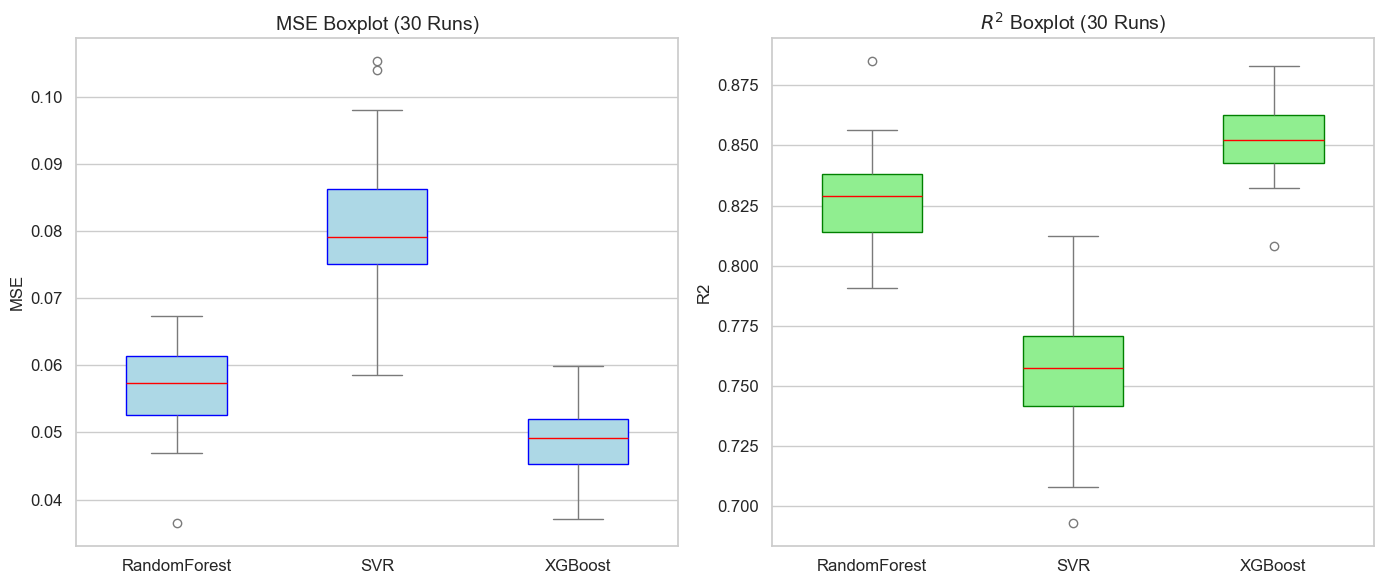

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 假設 results 字典已包含各模型 30 次的結果
# 轉換資料格式
mse_df = pd.DataFrame({
    'RandomForest': results['RandomForest']['MSE'],
    'SVR': results['SVR']['MSE'],
    'XGBoost': results['XGBoost']['MSE']
})
r2_df = pd.DataFrame({
    'RandomForest': results['RandomForest']['R2'],
    'SVR': results['SVR']['R2'],
    'XGBoost': results['XGBoost']['R2']
})

# 使用 melt 將資料轉為長格式 (long-form)
mse_long = mse_df.melt(var_name='Model', value_name='MSE')
r2_long = r2_df.melt(var_name='Model', value_name='R2')

# 設定 Seaborn 主題
sns.set(style='whitegrid', palette='pastel')

# 建立圖形
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# MSE 盒鬚圖
sns.boxplot(x='Model', y='MSE', data=mse_long, ax=axes[0],
            width=0.5, showfliers=True, 
            boxprops={'facecolor':'lightblue', 'edgecolor':'blue'},
            medianprops={'color': 'red'})
axes[0].set_title('MSE Boxplot (30 Runs)', fontsize=14)
axes[0].set_xlabel('')
axes[0].tick_params(labelsize=12)

# R^2 盒鬚圖
sns.boxplot(x='Model', y='R2', data=r2_long, ax=axes[1],
            width=0.5, showfliers=True,
            boxprops={'facecolor':'lightgreen', 'edgecolor':'green'},
            medianprops={'color': 'red'})
axes[1].set_title('$R^2$ Boxplot (30 Runs)', fontsize=14)
axes[1].set_xlabel('')
axes[1].tick_params(labelsize=12)

plt.tight_layout()
plt.show()